## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [2]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

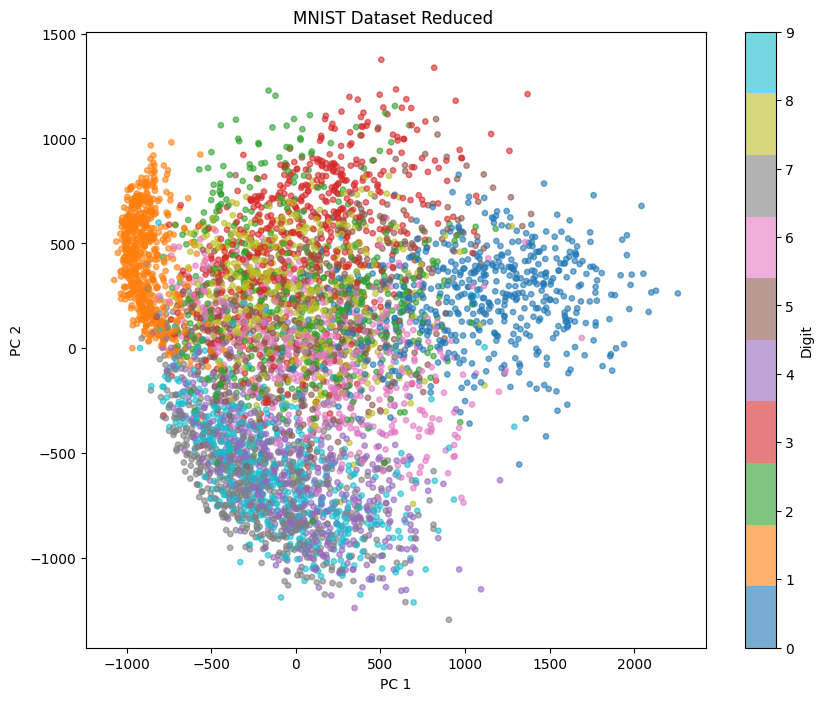

In [ ]:
# Your code here
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

X, y = X[:7000], y[:7000]

X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)  
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
X_mnist_test_pca = pca.transform(X_mnist_test)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_mnist_train_pca[:, 0], 
X_mnist_train_pca[:, 1], 
c=y_mnist_train, 
cmap="tab10", 
alpha=0.6, 
s=15)

plt.title("MNIST Dataset Reduced ")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(scatter, label="Digit")
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

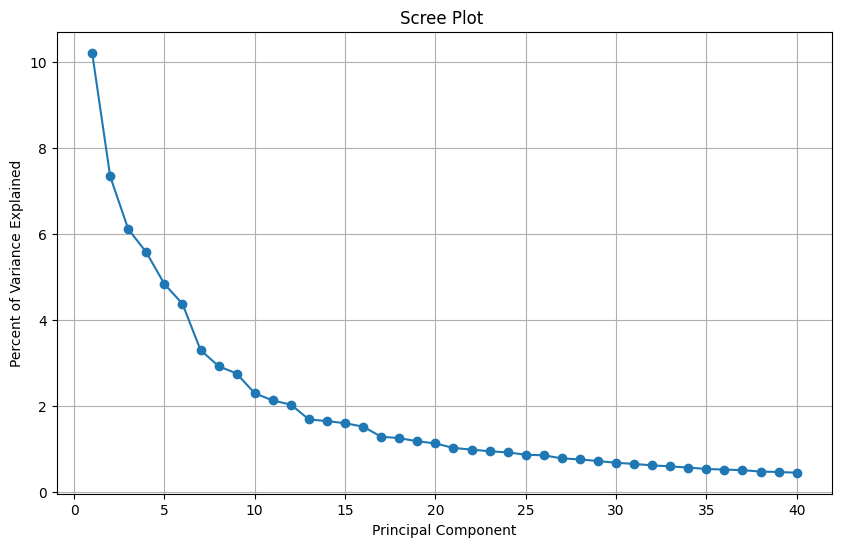

In [7]:
# Your code here
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca_full = PCA()
pca_full.fit(X_mnist_train)
explained_variance_ratio = pca_full.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 41), explained_variance_ratio[:40] * 100, marker='o')
plt.title("Scree Plot ")
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.grid(True)
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [8]:
# Your code here
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  

print(f"Number of components  95% variance: {n_components_95}")

Number of components  95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

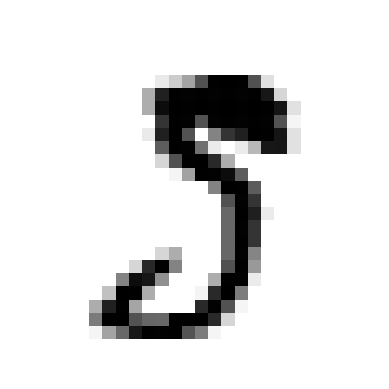

In [ ]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

Original Digit:


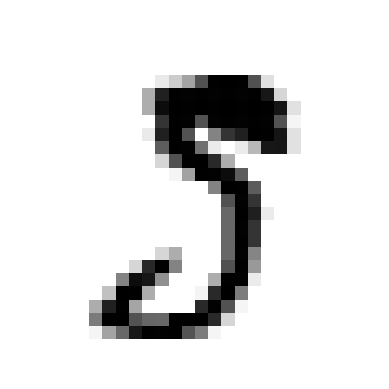

Digit using 148 components:


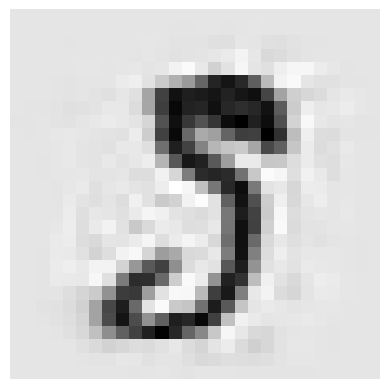

In [11]:
# Your code here
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.
    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()



pca_reduced = PCA(n_components=n_components_95)
X_mnist_train_reduced = pca_reduced.fit_transform(X_mnist_train)


X_mnist_train_reconstructed = pca_reduced.inverse_transform(X_mnist_train_reduced)


print("Original Digit:")
plot_mnist_digit(X_mnist_train[0])

# 4. Plot reconstructed digit
print(f"Digit using {n_components_95} components:")
plot_mnist_digit(X_mnist_train_reconstructed[0])


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [14]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_mnist_train, y_mnist_train)
y_pred_original = knn.predict(X_mnist_test)
acc_original = accuracy_score(y_mnist_test, y_pred_original)
print(f"Accuracy without PCA: {acc_original:.4f}")

pca_80 = PCA(n_components=0.80) 
X_mnist_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_mnist_test_pca80 = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_mnist_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_mnist_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"PCA with Accuracy (80% variance): {acc_pca:.4f}")

print(f"Original dimension: {X_mnist_train.shape[1]}")
print(f"Reduced dimension (80% variance): {X_mnist_train_pca80.shape[1]}")


Accuracy without PCA: 0.9429
PCA with Accuracy (80% variance): 0.9457
Original dimension: 784
Reduced dimension (80% variance): 42


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

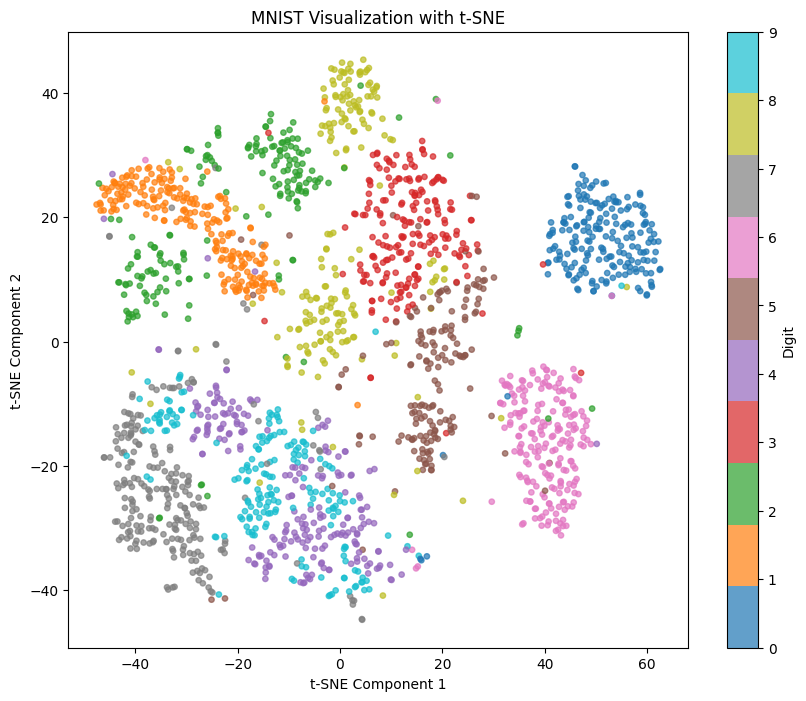

In [ ]:
# Your code here
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_sample = X_mnist_train[:2000]
y_sample = y_mnist_train[:2000]
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_sample)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap="tab10", s=15, alpha=0.7)
plt.title("MNIST Visualization with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()



2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [18]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(
    X_tsne, y_sample, test_size=0.2, random_state=42
)
knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_tsne_train, y_tsne_train)

y_pred_tsne = knn_tsne.predict(X_tsne_test)
acc_tsne = accuracy_score(y_tsne_test, y_pred_tsne)
print(f"KNN Accuracy on t-SNE-transformed data: {acc_tsne:.4f}")


KNN Accuracy on t-SNE-transformed data: 0.9100


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [19]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 46.4 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.1 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [numba]te]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install -

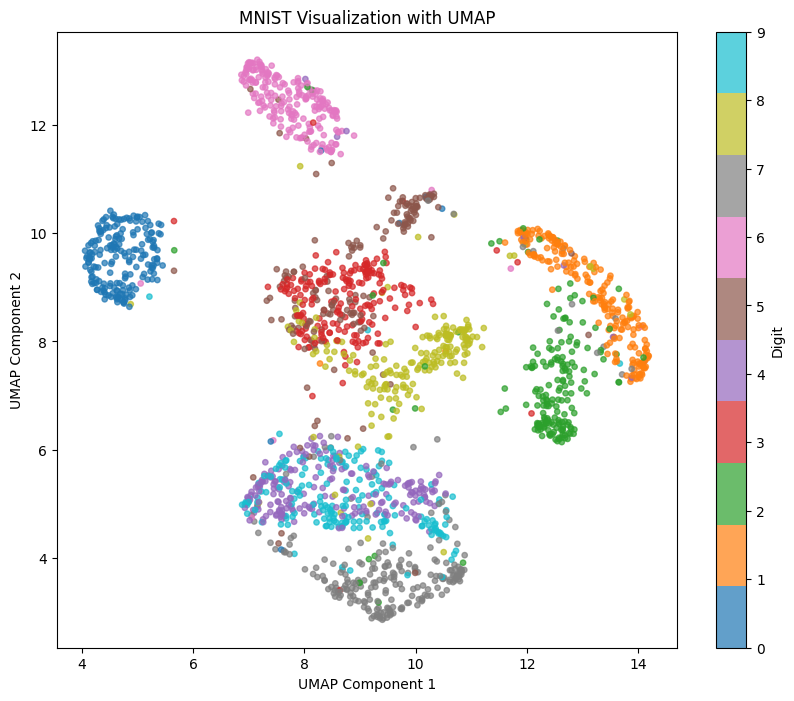

In [31]:
# Your code here
import warnings
warnings.filterwarnings("ignore")
import umap
import matplotlib.pyplot as plt
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_sample)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap="tab10", s=15, alpha=0.7)
plt.title("MNIST Visualization with UMAP")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(scatter, label="Digit")
plt.show()


Now, calculate accuracy with KNN.

In [22]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(
    X_umap, y_sample, test_size=0.2, random_state=42
)

knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_umap_train, y_umap_train)

y_pred_umap = knn_umap.predict(X_umap_test)
acc_umap = accuracy_score(y_umap_test, y_pred_umap)

print(f"KNN Accuracy on UMAP-transformed data: {acc_umap:.4f}")


KNN Accuracy on UMAP-transformed data: 0.8175


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


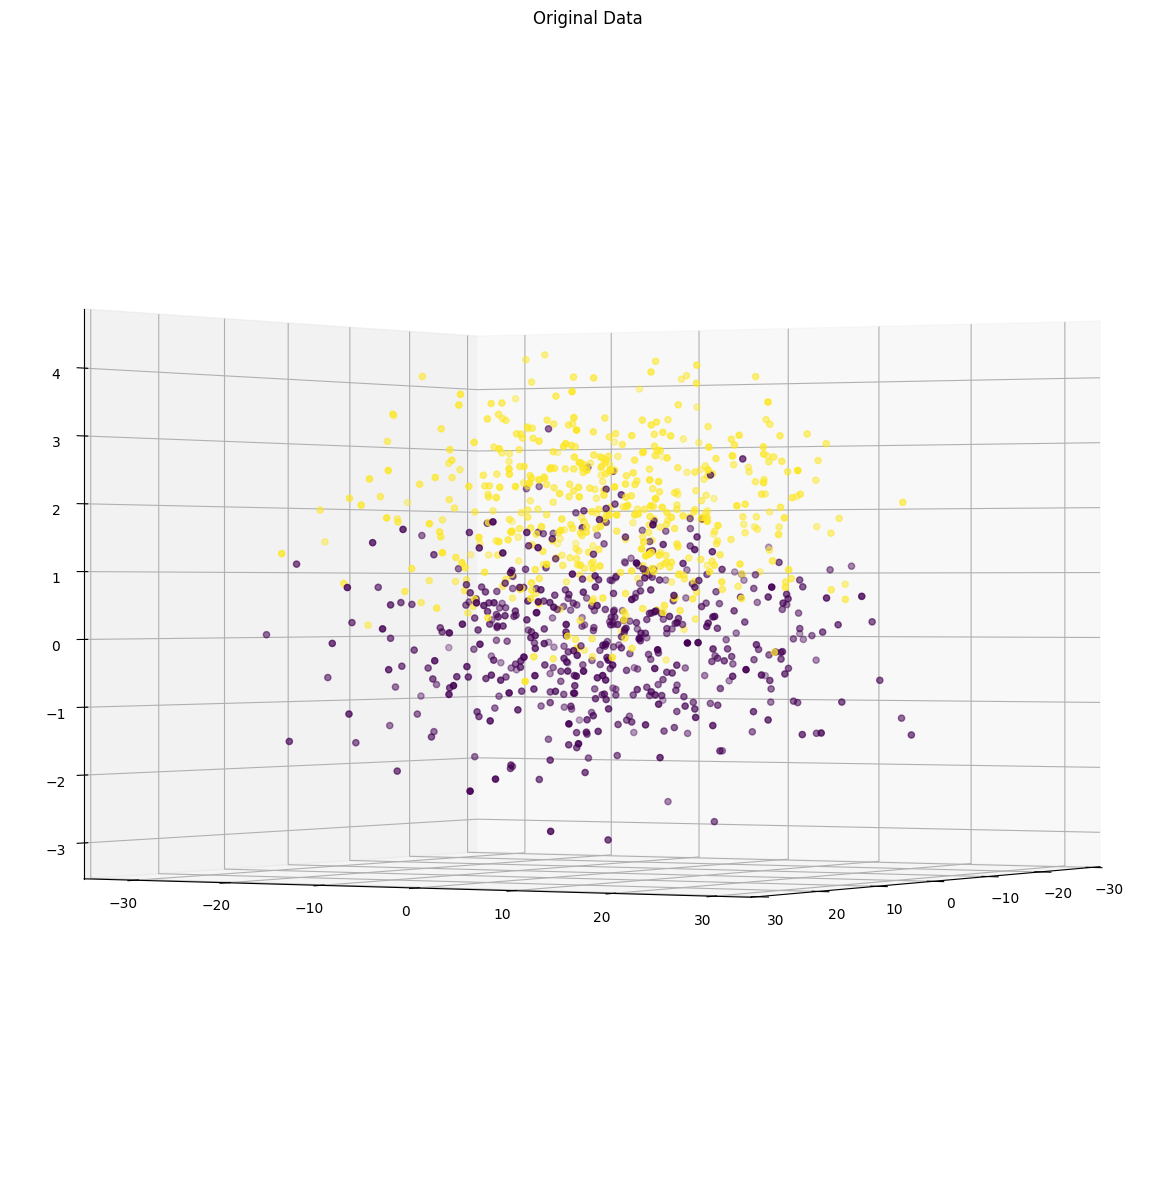

In [23]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [24]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [27]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train)
X_test_pca2 = pca_2.transform(X_test)
knn_pca2 = KNeighborsClassifier()
knn_pca2.fit(X_train_pca2, y_train)
y_pred_pca2 = knn_pca2.predict(X_test_pca2)
print(f"PCA 2D Accuracy: {accuracy_score(y_test, y_pred_pca2):.4f}")
pca_1 = PCA(n_components=1)
X_train_pca1 = pca_1.fit_transform(X_train)
X_test_pca1 = pca_1.transform(X_test)
knn_pca1 = KNeighborsClassifier()
knn_pca1.fit(X_train_pca1, y_train)
y_pred_pca1 = knn_pca1.predict(X_test_pca1)
print(f"PCA 1D Accuracy: {accuracy_score(y_test, y_pred_pca1):.4f}")


PCA 2D Accuracy: 0.5050
PCA 1D Accuracy: 0.4850


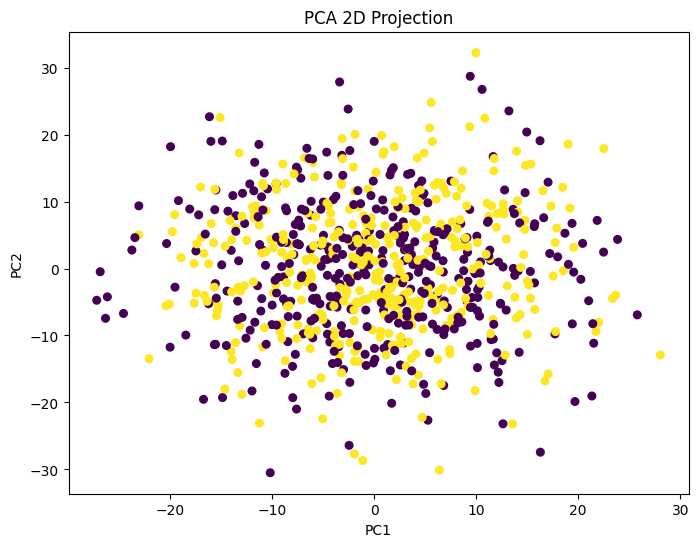

In [ ]:
# Your code here
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], c=y_train, cmap='viridis', s=30)
plt.title("PCA 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

2. Try with UMAP.

In [ ]:
# Your code here
import warnings
warnings.filterwarnings("ignore")
import umap

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_train_umap2 = umap_2d.fit_transform(X_train)
X_test_umap2 = umap_2d.transform(X_test)

knn_umap2 = KNeighborsClassifier()
knn_umap2.fit(X_train_umap2, y_train)
y_pred_umap2 = knn_umap2.predict(X_test_umap2)
print(f"UMAP 2D Accuracy (default): {accuracy_score(y_test, y_pred_umap2):.4f}")

umap_2d_alt = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)
X_train_umap2_alt = umap_2d_alt.fit_transform(X_train)
X_test_umap2_alt = umap_2d_alt.transform(X_test)

knn_umap2_alt = KNeighborsClassifier()
knn_umap2_alt.fit(X_train_umap2_alt, y_train)
y_pred_umap2_alt = knn_umap2_alt.predict(X_test_umap2_alt)
print(f"UMAP 2D Accuracy (n_neighbors=30): {accuracy_score(y_test, y_pred_umap2_alt):.4f}")



UMAP 2D Accuracy (default): 0.5450
UMAP 2D Accuracy (n_neighbors=30): 0.5250


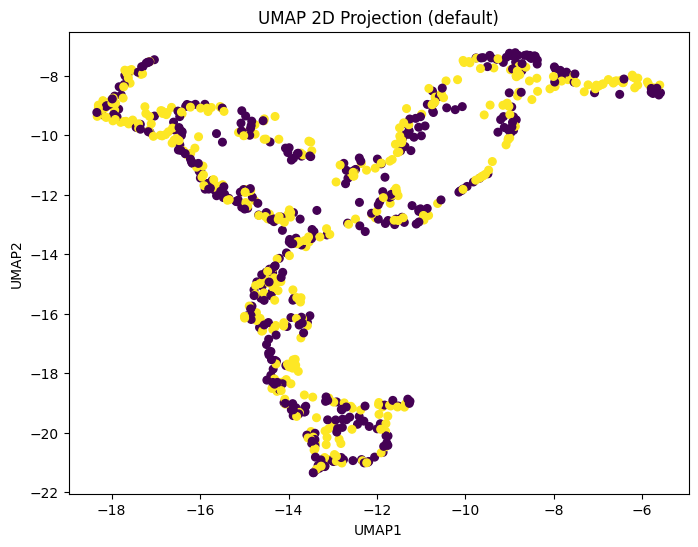

In [ ]:
# Your code here
plt.figure(figsize=(8,6))
plt.scatter(X_train_umap2[:,0], X_train_umap2[:,1], c=y_train, cmap='viridis', s=30)
plt.title("UMAP 2D Projection (default)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

Explain your results in the cell below.  Which works better?  Why?

*Enter your answer in this cell*

In [ ]:
#PCA works well for this data because the classes are mostly linearly separable, while UMAP gives nicer visualizations and preserves local structure, but its accuracy isn’t always higher on small datasets